In [12]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [13]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [14]:
NUM_CLASSES = 35

# Dataset reading

In [15]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [16]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [19]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 35)                385       
                                                                 
Total params: 1455 (5.68 KB)
Trainable params: 1455 (5.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [21]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [22]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
184/201 [==========================>...] - ETA: 0s - loss: 3.3984 - accuracy: 0.0665
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 1s 3ms/step - loss: 3.3721 - accuracy: 0.0702 - val_loss: 2.8767 - val_accuracy: 0.2753
Epoch 2/1000
107/201 [==============>...............] - ETA: 0s - loss: 2.8428 - accuracy: 0.1605

c:\users\khand\onedrive\desktop\final year project\code base\hand-gesture-recognition-mediapipe\train\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


178/201 [=========================>....] - ETA: 0s - loss: 2.7250 - accuracy: 0.1801
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 0s 2ms/step - loss: 2.6971 - accuracy: 0.1849 - val_loss: 2.0514 - val_accuracy: 0.5103
Epoch 3/1000
186/201 [==========================>...] - ETA: 0s - loss: 2.2672 - accuracy: 0.2716
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 0s 2ms/step - loss: 2.2566 - accuracy: 0.2756 - val_loss: 1.6352 - val_accuracy: 0.6881
Epoch 4/1000
186/201 [==========================>...] - ETA: 0s - loss: 2.0546 - accuracy: 0.3267
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 0s 2ms/step - loss: 2.0508 - accuracy: 0.3287 - val_loss: 1.4183 - val_accuracy: 0.7970
Epoch 5/1000
196/201 [============================>.] - ETA: 0s - loss: 1.9234 - accuracy: 0.3608


Epoch 29/1000
190/201 [===========================>..] - ETA: 0s - loss: 1.3636 - accuracy: 0.5317
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 0s 2ms/step - loss: 1.3614 - accuracy: 0.5323 - val_loss: 0.6182 - val_accuracy: 0.8900
Epoch 30/1000
189/201 [===========================>..] - ETA: 0s - loss: 1.3606 - accuracy: 0.5318
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 0s 2ms/step - loss: 1.3617 - accuracy: 0.5317 - val_loss: 0.6013 - val_accuracy: 0.8834
Epoch 31/1000
196/201 [============================>.] - ETA: 0s - loss: 1.3674 - accuracy: 0.5301
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 0s 2ms/step - loss: 1.3667 - accuracy: 0.5304 - val_loss: 0.6071 - val_accuracy: 0.8896
Epoch 32/1000
176/201 [=========================>....] - ETA: 0s - loss: 1.3398

Epoch 56/1000
190/201 [===========================>..] - ETA: 0s - loss: 1.2664 - accuracy: 0.5642
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 0s 2ms/step - loss: 1.2677 - accuracy: 0.5642 - val_loss: 0.5502 - val_accuracy: 0.8968
Epoch 57/1000
195/201 [============================>.] - ETA: 0s - loss: 1.2556 - accuracy: 0.5688
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 0s 2ms/step - loss: 1.2557 - accuracy: 0.5689 - val_loss: 0.5429 - val_accuracy: 0.9035
Epoch 58/1000
171/201 [========================>.....] - ETA: 0s - loss: 1.2496 - accuracy: 0.5710
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 0s 2ms/step - loss: 1.2479 - accuracy: 0.5726 - val_loss: 0.5514 - val_accuracy: 0.8889
Epoch 59/1000
182/201 [==========================>...] - ETA: 0s - loss: 1.2463

Epoch 83/1000
182/201 [==========================>...] - ETA: 0s - loss: 1.2083 - accuracy: 0.5848
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 0s 2ms/step - loss: 1.2085 - accuracy: 0.5846 - val_loss: 0.5443 - val_accuracy: 0.8979
Epoch 84/1000
186/201 [==========================>...] - ETA: 0s - loss: 1.1989 - accuracy: 0.5879
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 0s 2ms/step - loss: 1.2005 - accuracy: 0.5870 - val_loss: 0.5496 - val_accuracy: 0.8777
Epoch 85/1000
183/201 [==========================>...] - ETA: 0s - loss: 1.1969 - accuracy: 0.5959
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 0s 2ms/step - loss: 1.1954 - accuracy: 0.5959 - val_loss: 0.5554 - val_accuracy: 0.8752
Epoch 86/1000
187/201 [==========================>...] - ETA: 0s - loss: 1.1744

In [23]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

67/67 [==============================] - 0s 1ms/step - loss: 0.5487 - accuracy: 0.8741


In [24]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [25]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 68ms/step
[5.4710480e-36 2.8824721e-18 8.1117262e-14 3.3195189e-16 5.2665344e-14
 8.4133280e-22 2.4609137e-26 5.7312211e-30 7.4620069e-25 2.6845476e-10
 9.1717192e-07 1.3144696e-10 5.6921653e-02 1.9061560e-27 2.0943029e-11
 1.7055027e-06 3.4763201e-04 9.5374882e-05 5.0587986e-26 1.3626890e-05
 1.6678422e-15 1.1600356e-17 6.4521217e-08 5.6396621e-09 3.9740318e-01
 1.1697342e-05 1.9338416e-34 8.4015965e-13 6.8732021e-08 8.8460226e-09
 1.6816159e-15 0.0000000e+00 7.6570410e-20 5.4520404e-01 5.9201019e-11]
33


# Confusion matrix

268/268 [==============================] - 0s 779us/step


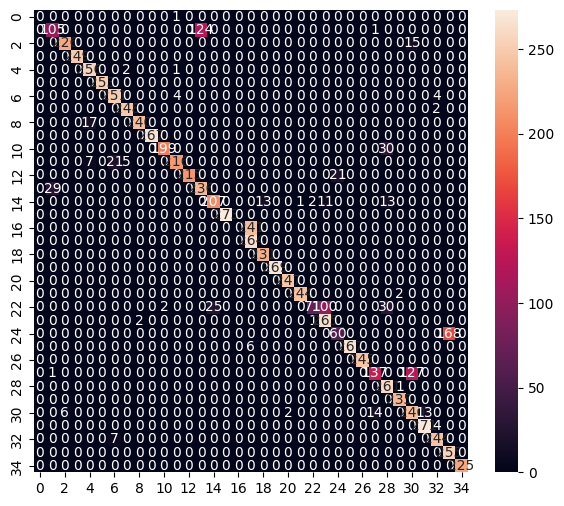

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.78      0.46      0.58       230
           2       0.97      0.94      0.96       241
           3       1.00      1.00      1.00       249
           4       0.91      0.99      0.95       259
           5       1.00      1.00      1.00       253
           6       0.90      0.97      0.93       259
           7       0.97      0.99      0.98       250
           8       0.99      0.93      0.96       257
           9       1.00      1.00      1.00       267
          10       0.99      0.87      0.93       229
          11       0.97      0.87      0.92       249
          12       1.00      0.91      0.95       236
          13       0.66      0.89      0.76       265
          14       0.89      0.84      0.86       247
          15       1.00      1.00      1.00       273
          16       0.00      0.00      0.00       241
     

c:\users\khand\onedrive\desktop\final year project\code base\hand-gesture-recognition-mediapipe\train\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\khand\onedrive\desktop\final year project\code base\hand-gesture-recognition-mediapipe\train\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\khand\onedrive\desktop\final year project\code base\hand-gesture-recognition-mediapipe\train\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-d

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [27]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

c:\users\khand\onedrive\desktop\final year project\code base\hand-gesture-recognition-mediapipe\train\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\khand\AppData\Local\Temp\tmptfd6qm6d\assets


INFO:tensorflow:Assets written to: C:\Users\khand\AppData\Local\Temp\tmptfd6qm6d\assets


7936

# Inference test

In [29]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [30]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [31]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [32]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [33]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.47105233e-36 2.88247504e-18 8.11176552e-14 3.31952212e-16
 5.26653882e-14 8.41330278e-22 2.46092509e-26 5.73118233e-30
 7.46201230e-25 2.68453926e-10 9.17169984e-07 1.31447075e-10
 5.69215342e-02 1.90617221e-27 2.09430060e-11 1.70549924e-06
 3.47632507e-04 9.53748749e-05 5.05882231e-26 1.36269009e-05
 1.66783731e-15 1.16003214e-17 6.45210960e-08 5.63965630e-09
 3.97402793e-01 1.16973415e-05 1.93382849e-34 8.40163442e-13
 6.87318789e-08 8.84599682e-09 1.68161737e-15 0.00000000e+00
 7.65701964e-20 5.45204520e-01 5.92007346e-11]
33
